In [53]:
import json
import matplotlib.pyplot as plt

In [54]:
def move_element(data):
  if "proj" in data:
    # Move "proj" matrix info to the end
    data["proj"] = data.pop("proj")
    
  elif "0.proj" in data:
    # Move "proj" matrix info to the pnultimate position, before the  classif. head
    proj_val = data.pop("0.proj")
    head_val = data.pop("1.weight")
    data["0.proj"] = proj_val
    data["1.weight"] = head_val

  return data

def clip_vit_overview(data, model_name, dataset_name=None):
  
  # Lower dim proj is actually the Last transformation in ViT
  data = move_element(data)

  layers = list(data.keys())
  ranks = [value['rank'] for value in data.values()]
  max_ranks = [min(value["size"]) for value in data.values()]
  color_dict = {
    "Max rank": "gainsboro",
    "Actual rank": "gray"
  }

  # Add vertical lines in the background
  for layer, rank, max_rank in zip(layers, ranks, max_ranks):
    plt.vlines(x=layer, ymin=rank, ymax=max_rank, colors='gainsboro', linestyles='dotted', zorder=1)

  # Add points in the foreground
  plt.scatter(layers, max_ranks, c="gainsboro", zorder=2)
  plt.scatter(layers, ranks, c="gray", zorder=2)
  plt.xlabel('Modules overview')
  plt.xticks([])
  plt.ylabel('Ranks')

  if dataset_name:
    plt.title(f'ViT-B/32 {model_name}' + f'\nGradients computed on {dataset_name}')
  else:
    plt.title(f'ViT-B/32 {model_name}' + "\nWeights matrices")
  handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=v, markersize=8) for v in color_dict.values()]
  plt.legend(handles, list(color_dict.keys()), loc='upper left', bbox_to_anchor=(1, 1))

  plt.tight_layout()
  plt.show()

In [55]:
def clip_vit_transformers_rank(data, model_name, dataset_name):
  layers = []
  ranks = []
  colors = []
  color_dict = {
    "attn_in_proj": "lightcoral", 
    "attn_out_proj": "firebrick", 
    "mlp_layer1": "lightsteelblue", 
    "mlp_layer2": "cornflowerblue"
  }

  for key, value in data.items():
    if "transformer.resblocks" in key:
      transformer_id = key.split(".")[3]
      layers.append(f"T{transformer_id}")
      ranks.append(value["rank"])

      if "attn.in_proj" in key:
        colors.append("lightcoral")
      elif "attn.out_proj" in key:
        colors.append("firebrick")
      elif "mlp.c_fc" in key:
        colors.append("lightsteelblue")
      elif "mlp.c_proj" in key:
        colors.append("cornflowerblue")

  plt.scatter(layers, ranks, c=colors)
  plt.axhline(y=768, color="gray", linestyle='--')
  plt.xlabel('Transformer Blocks')
  plt.ylabel('Ranks\n(gradient matrices)')
  plt.ylim(bottom=0, top=800)
  plt.title(f'ViT-B/32 {model_name}' + f'\nGradients computed on {dataset_name}')

  handles = [plt.Line2D([0], [0], color='gray', linestyle='--', markersize=8)]
  handles.extend([plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=v, markersize=8) for v in color_dict.values()])
  plt.legend(handles, ['Max Rank = 768'] + list(color_dict.keys()), loc='upper left', bbox_to_anchor=(1, 1))

  plt.tight_layout()
  plt.show()

# ViT-B/32 pretrained from CLIP

### Weights matrices

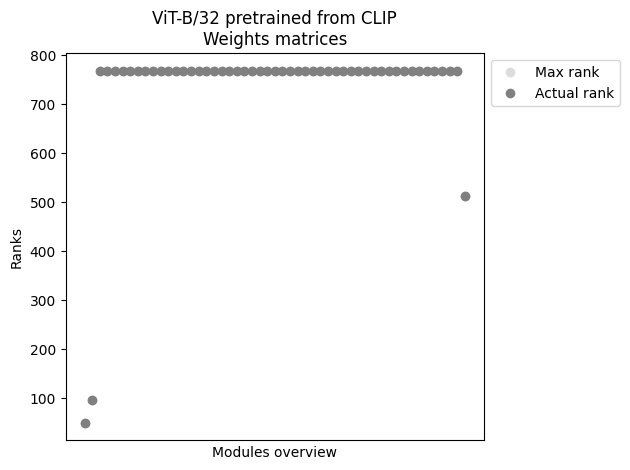

In [56]:
model_name = "pretrained from CLIP"
with open('vitB32_weights_rank_clip.json','r') as fp:
  data = json.load(fp)
clip_vit_overview(data, model_name)

### Grad on CIFAR10

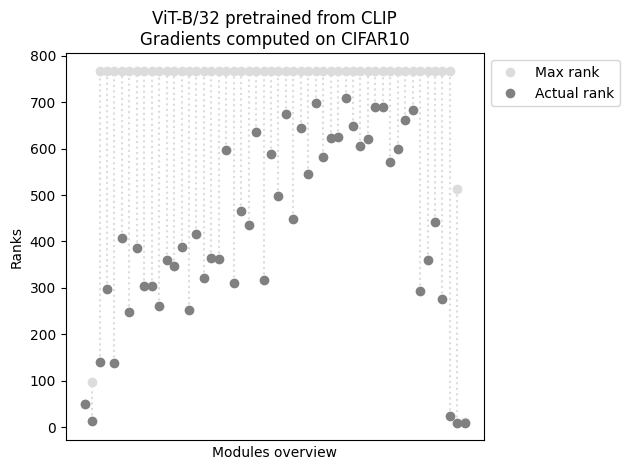

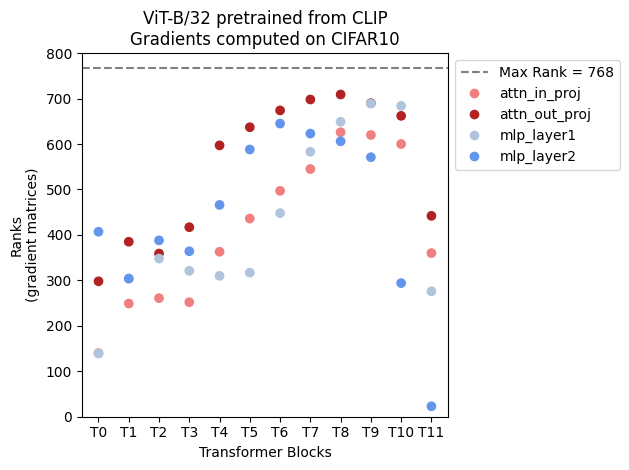

In [57]:
dataset_name = "CIFAR10"
with open('vitB32_grad_rank_clip_cifar10.json','r') as fp:
  data = json.load(fp)
clip_vit_overview(data, model_name, dataset_name)
clip_vit_transformers_rank(data, model_name, dataset_name)

### Grad on CIFAR100 

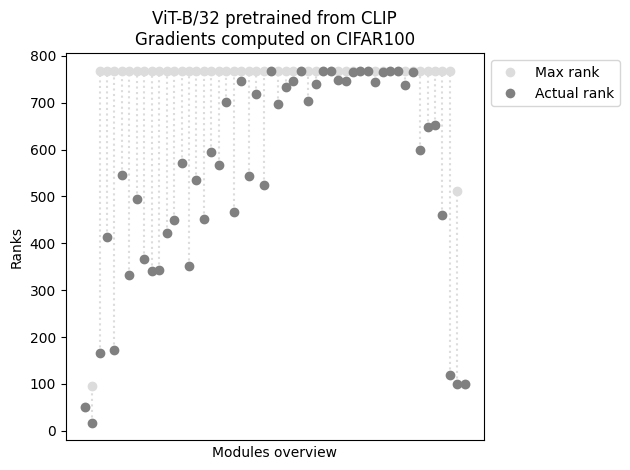

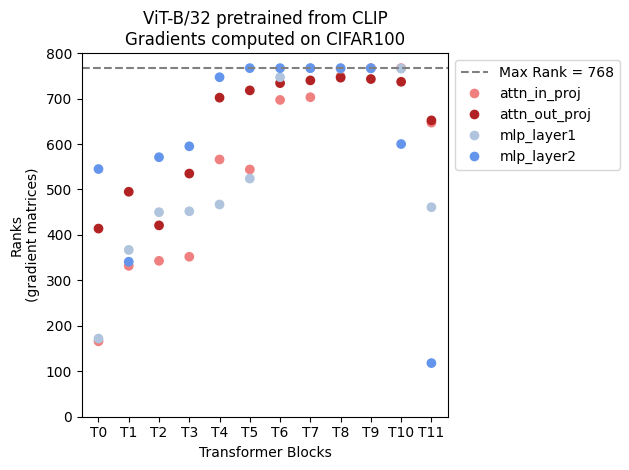

In [58]:
dataset_name = "CIFAR100"
with open('vitB32_grad_rank_clip_cifar100.json','r') as fp:
  data = json.load(fp)
clip_vit_overview(data, model_name, dataset_name)
clip_vit_transformers_rank(data, model_name, dataset_name)

### Grad on Tiny-ImageNet

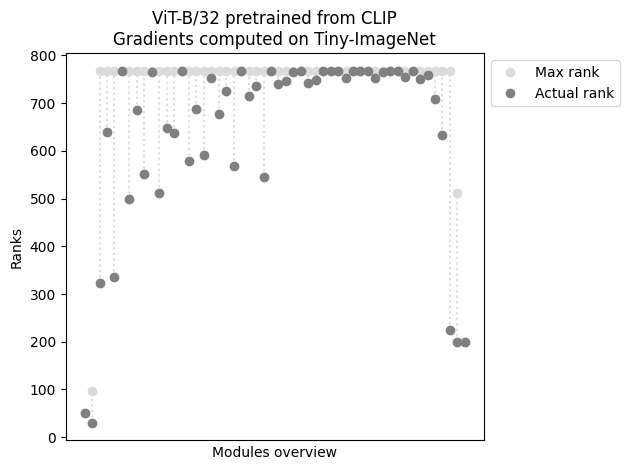

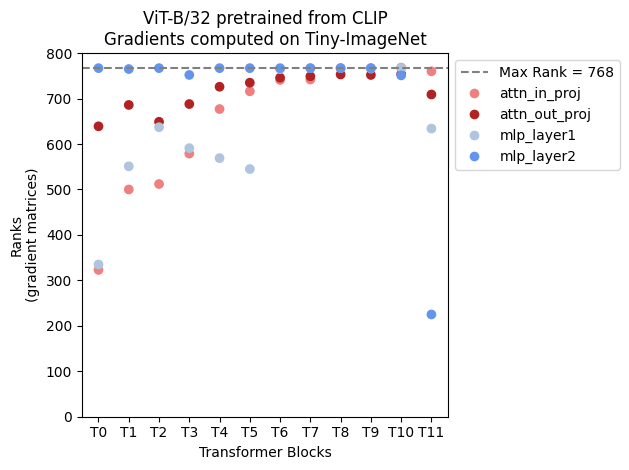

In [59]:
dataset_name = "Tiny-ImageNet"
with open('vitB32_grad_rank_clip_tiny.json','r') as fp:
  data = json.load(fp)
clip_vit_overview(data, model_name, dataset_name)
clip_vit_transformers_rank(data, model_name, dataset_name)

# ViT-B/32 initialized with Kaiming

### Weights matrices

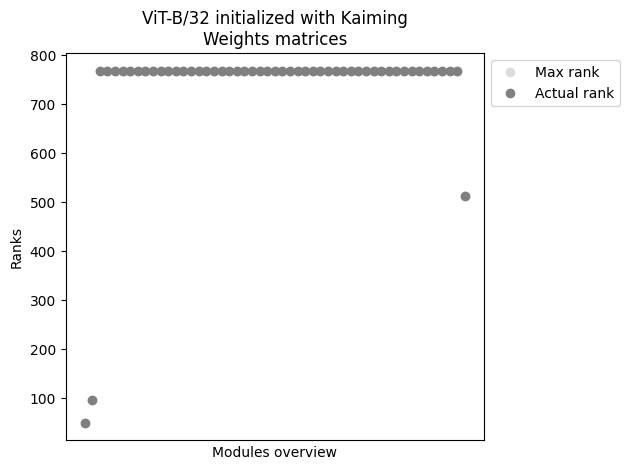

In [60]:
model_name = "initialized with Kaiming"
with open('vitB32_weights_rank_kaiming.json','r') as fp:
  data = json.load(fp)
clip_vit_overview(data, model_name)

### Grad on CIFAR10

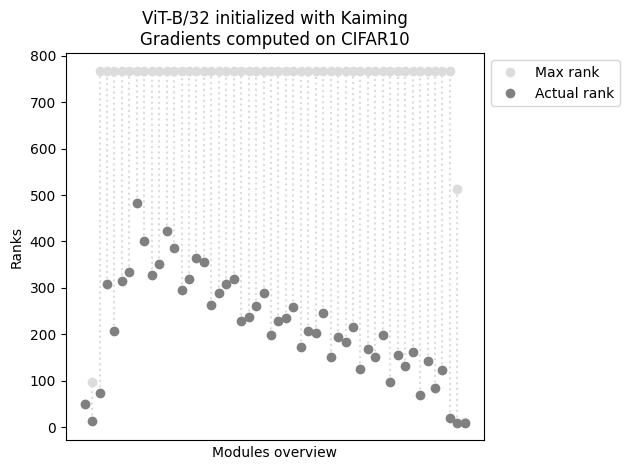

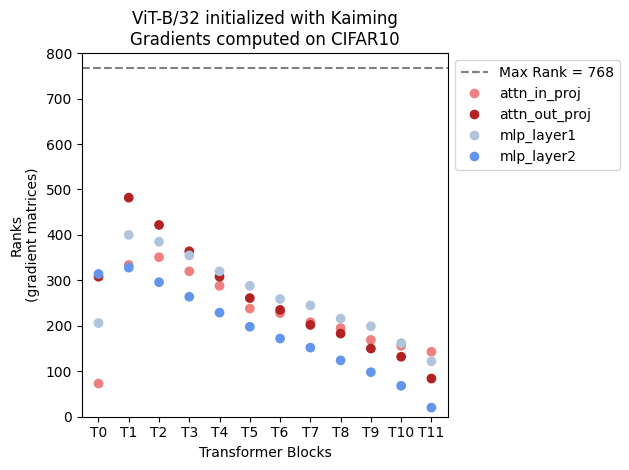

In [61]:
dataset_name = "CIFAR10"
with open('vitB32_grad_rank_kaiming_cifar10.json','r') as fp:
  data = json.load(fp)
clip_vit_overview(data, model_name, dataset_name)
clip_vit_transformers_rank(data, model_name, dataset_name)

### Grad on CIFAR100 

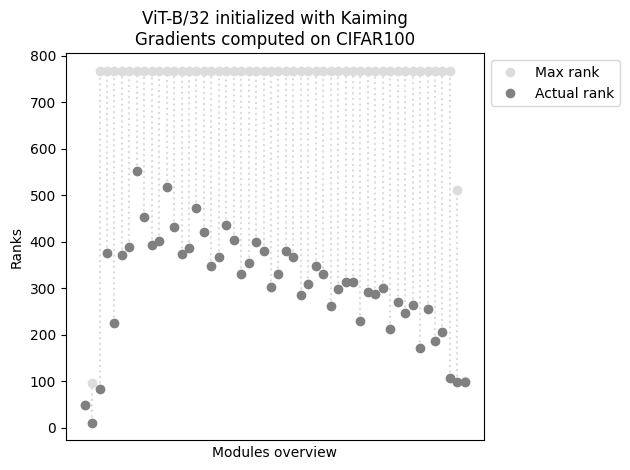

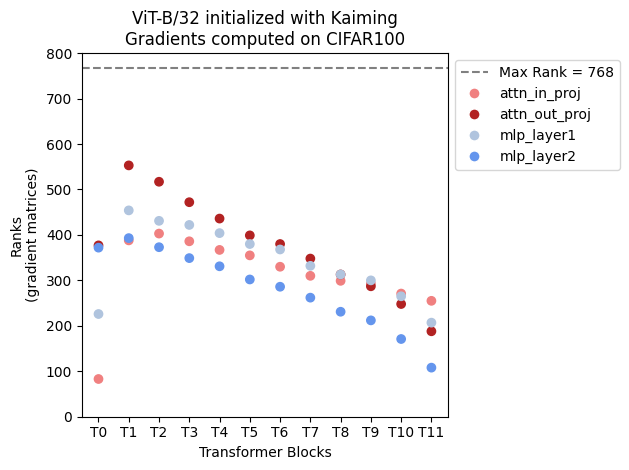

In [62]:
dataset_name = "CIFAR100"
with open('vitB32_grad_rank_kaiming_cifar100.json','r') as fp:
  data = json.load(fp)
clip_vit_overview(data, model_name, dataset_name)
clip_vit_transformers_rank(data, model_name, dataset_name)

### Grad on Tiny-ImageNet

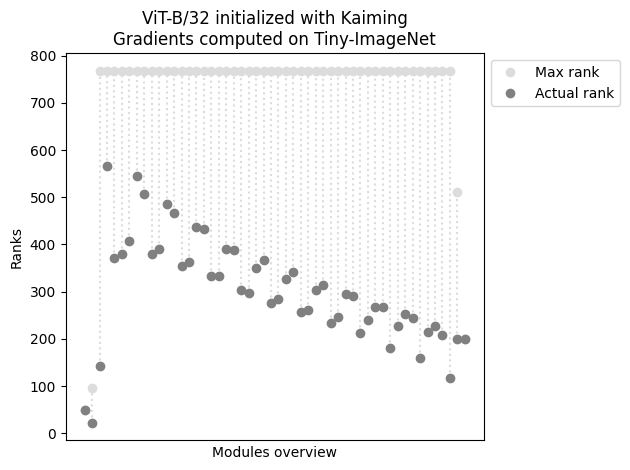

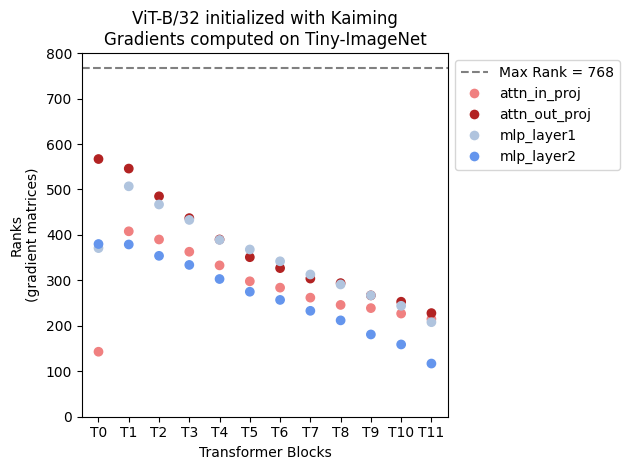

In [63]:
dataset_name = "Tiny-ImageNet"
with open('vitB32_grad_rank_kaiming_tiny.json','r') as fp:
  data = json.load(fp)
clip_vit_overview(data, model_name, dataset_name)
clip_vit_transformers_rank(data, model_name, dataset_name)